<a href="https://colab.research.google.com/github/Sharath2021/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [3]:
# importing important libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# dataset
retail_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Capstone_Unsupervised/Online Retail.xlsx')

In [6]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
retail_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
retail_data.shape

(541909, 8)

In [10]:
null_values = retail_data.isnull().sum()
total = len(retail_data)
null_percent = (null_values/total)*100
null_df = pd.concat([null_values,null_percent],axis = 1,keys = ['Total Null Values','Percentage %'])
null_df

,Total Null Values,Percentage %
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000


In [11]:
# removing all null values
retail_data.dropna(inplace=True)

In [12]:
# checking null values
retail_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
retail_data.shape

(406829, 8)

In [14]:
# checking duplicated rows
print('No. of duplicate values are',len(retail_data[retail_data.duplicated()]))

No. of duplicate values are 5225


In [15]:
# removing duplicates
retail_data.drop_duplicates(inplace=True,ignore_index=True)

In [16]:
retail_data.shape

(401604, 8)

In [17]:
# converting invoice no to string type
retail_data['InvoiceNo']=retail_data['InvoiceNo'].astype('str')

In [18]:
# checking invoice no.
retail_data[retail_data['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
401243,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


 Invoice number that starts with 'C', means the order was cancelled and will remove them as cancelled orders does not count towards any monetary gain.

In [19]:
# removing cancelled orders
retail_data=retail_data[~retail_data['InvoiceNo'].str.contains('C')]
retail_data.reset_index(inplace=True)

In [20]:
retail_data.shape

(392732, 9)

In [21]:
# removing index column
retail_data.drop(columns=['index'],inplace=True)

In [22]:
# creating new features from invoice date
retail_data['Day']=retail_data['InvoiceDate'].dt.day_name()
retail_data['Month']=retail_data['InvoiceDate'].dt.month_name()
retail_data["year"] = retail_data["InvoiceDate"].apply(lambda x: x.year)
retail_data["month_num"] = retail_data["InvoiceDate"].apply(lambda x: x.month)
retail_data["day_num"] = retail_data["InvoiceDate"].apply(lambda x: x.day)
retail_data["hour"] = retail_data["InvoiceDate"].apply(lambda x: x.hour)
retail_data["minute"] = retail_data["InvoiceDate"].apply(lambda x: x.minute)

In [23]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26


In [24]:
# creating total amount column
retail_data['TotalAmount']=retail_data['Quantity']*retail_data['UnitPrice']

In [25]:
# changing dtype of cutomer id
retail_data['CustomerID']=retail_data['CustomerID'].astype('str')

In [26]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,year,month_num,day_num,hour,minute,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34


# EDA

In [27]:
# unique id's of customers
print('Number of customers = ',retail_data['CustomerID'].nunique())

Number of customers =  4339


In [28]:
# most active customer
active_customers=pd.DataFrame(retail_data['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers

,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677
...,...,...
4334,16990.0,1
4335,13302.0,1
4336,13017.0,1
4337,17923.0,1


In [29]:
active_customers.head()

,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


Text(0, 0.5, 'Count')

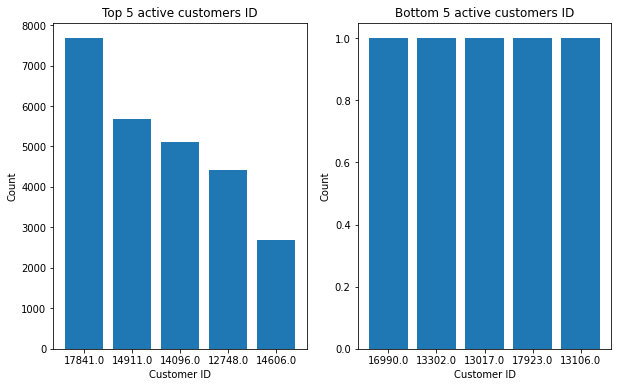

In [30]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.bar(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

In [31]:
# number of countries we have
print('Number of countries in the dataframe are ',retail_data['Country'].nunique())
print('They are : ',retail_data['Country'].unique())

Number of countries in the dataframe are  37
They are :  ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [32]:
# finding count of countries
retail_data['Country'].value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

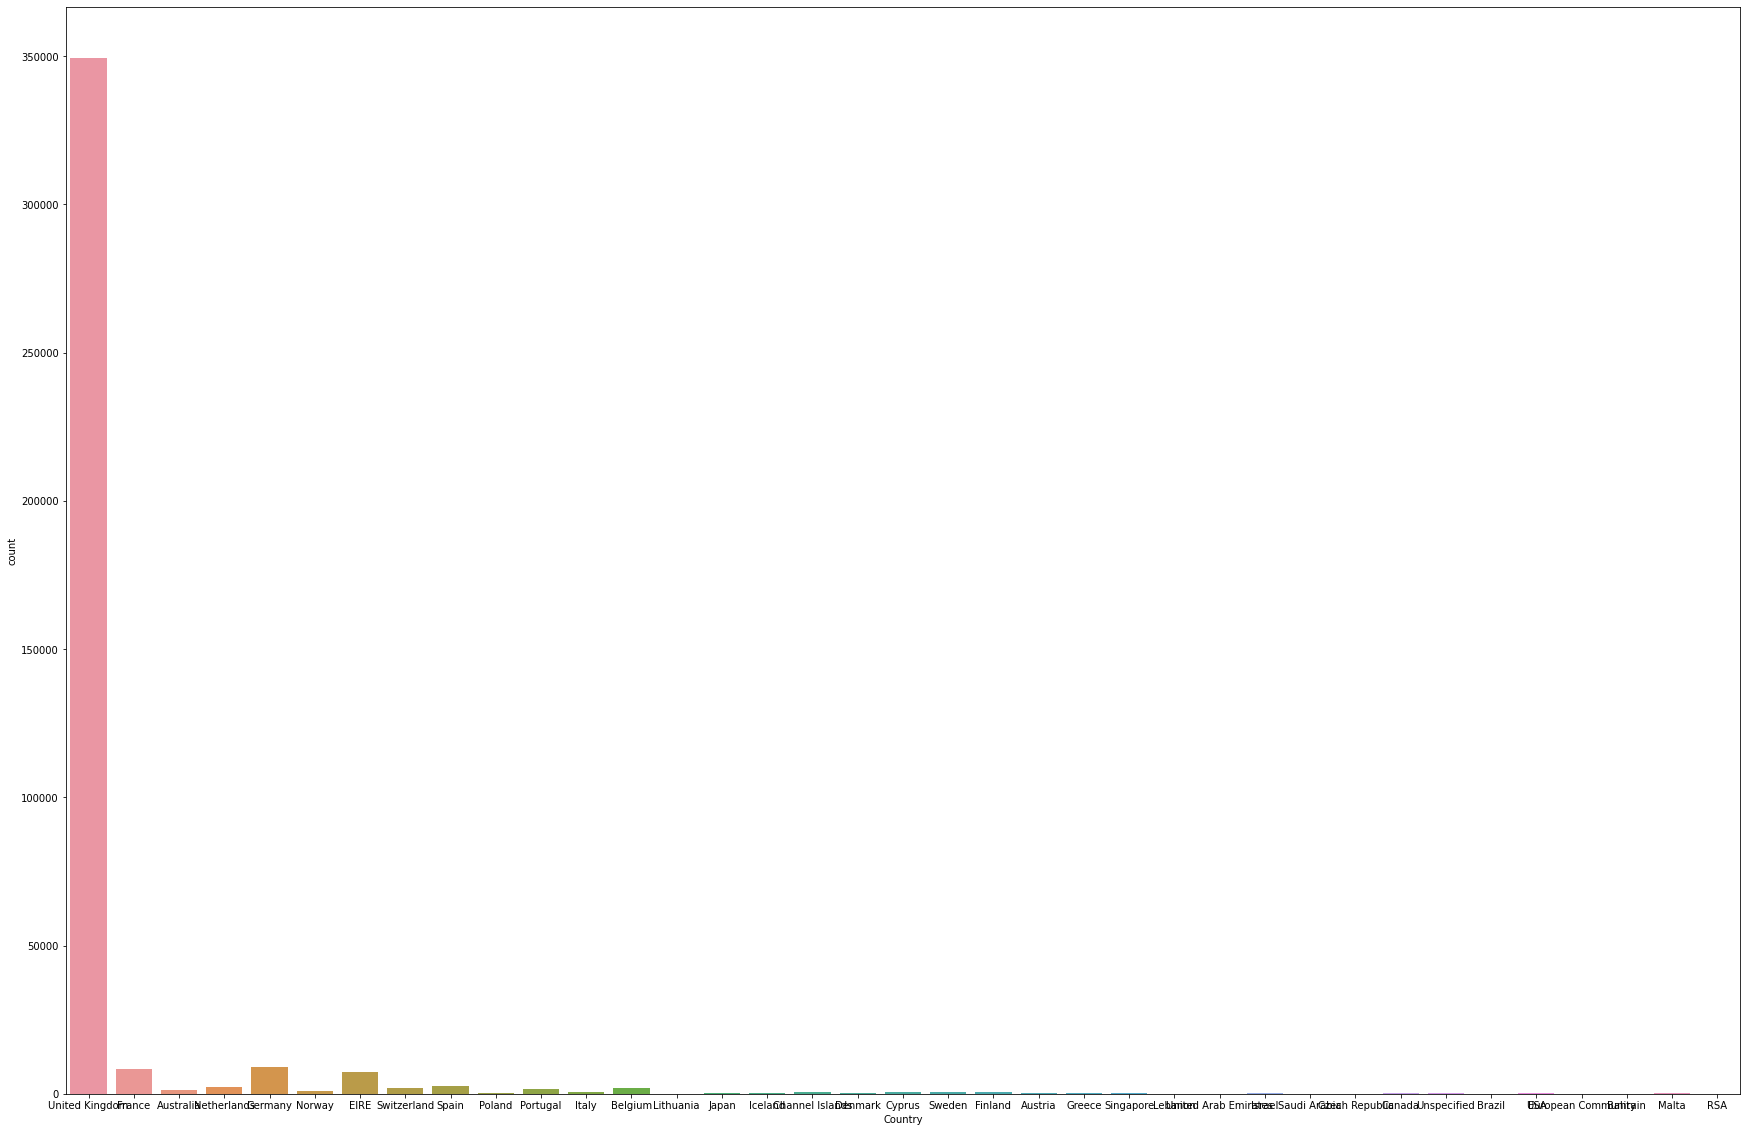

In [33]:
plt.figure(figsize=(30,20))
sns.countplot(retail_data['Country'])

In [34]:
# top 5 countries
country_df=retail_data['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


In [35]:
# bottom 5 countries
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


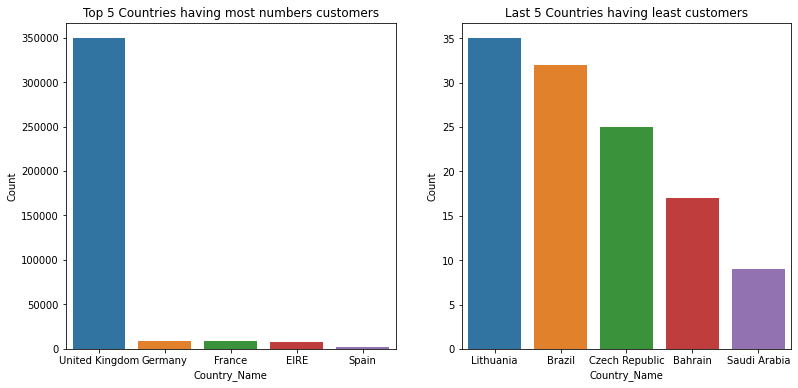

In [36]:
# visualizing top and bottom countries
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.title('Top 5 Countries having most numbers customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])
plt.subplot(1,2,2)
plt.title('Last 5 Countries having least customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

In [37]:
#number of products
print('Number of products are',retail_data['Description'].nunique())

Number of products are 3877


In [38]:
# top selling products by count
product=retail_data[['StockCode','Description']].groupby(['StockCode'])['Description'].value_counts().sort_values(ascending=False)
product

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2016
22423      REGENCY CAKESTAND 3 TIER              1714
85099B     JUMBO BAG RED RETROSPOT               1615
84879      ASSORTED COLOUR BIRD ORNAMENT         1395
47566      PARTY BUNTING                         1390
                                                 ... 
23086      ZINC STAR T-LIGHT HOLDER                 1
90060B     FIRE POLISHED GLASS NECKL GOLD           1
23253      16 PC CUTLERY SET PANTRY DESIGN          1
22896      PEG BAG APPLE DESIGN                     1
35597B     BLACKCHRISTMAS TREE 30CM                 1
Name: Description, Length: 3897, dtype: int64

In [39]:
# top 5 selling products based on count
print('The top 5 selling product based on count: ')
print('                                          ')
print(product[:5])

The top 5 selling product based on count: 
                                          
StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2016
22423      REGENCY CAKESTAND 3 TIER              1714
85099B     JUMBO BAG RED RETROSPOT               1615
84879      ASSORTED COLOUR BIRD ORNAMENT         1395
47566      PARTY BUNTING                         1390
Name: Description, dtype: int64


In [40]:
# bottom 5 selling products based on count
print('The bottom 5 selling product based on count: ')
print('                                            ')
print(product[-5:])

The bottom 5 selling product based on count: 
                                            
StockCode  Description                    
23086      ZINC STAR T-LIGHT HOLDER           1
90060B     FIRE POLISHED GLASS NECKL GOLD     1
23253      16 PC CUTLERY SET PANTRY DESIGN    1
22896      PEG BAG APPLE DESIGN               1
35597B     BLACKCHRISTMAS TREE 30CM           1
Name: Description, dtype: int64


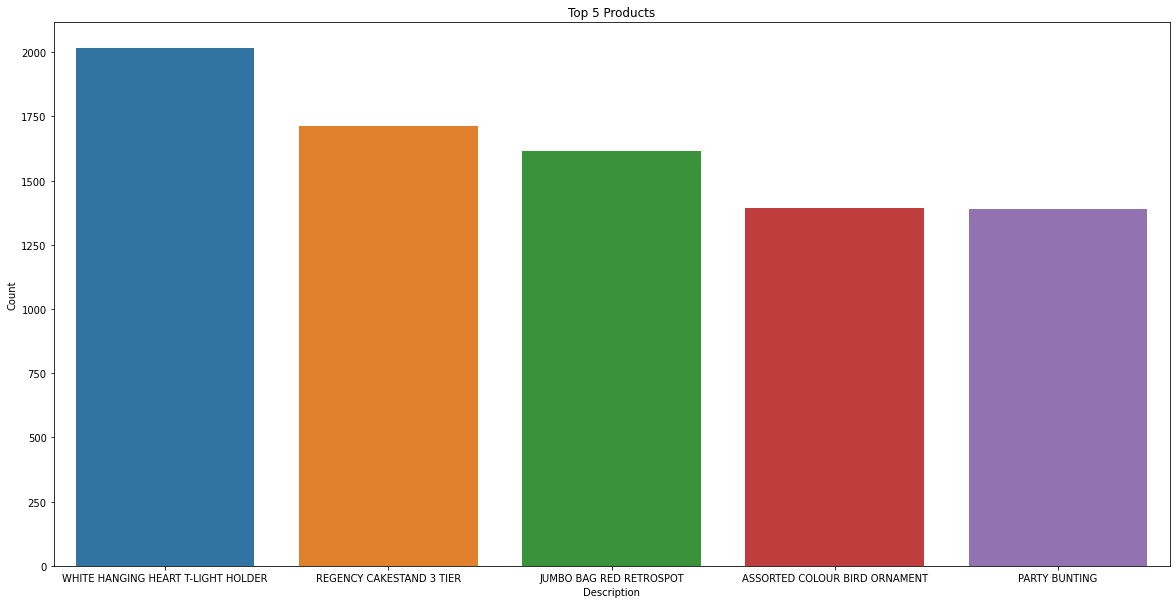

In [41]:
Description_df=retail_data['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description','Description': 'Count'}, inplace=True)
plt.figure(figsize=(20,10))
plt.title('Top 5 Products')
sns.barplot(x='Description',y='Count',data=Description_df[:5])

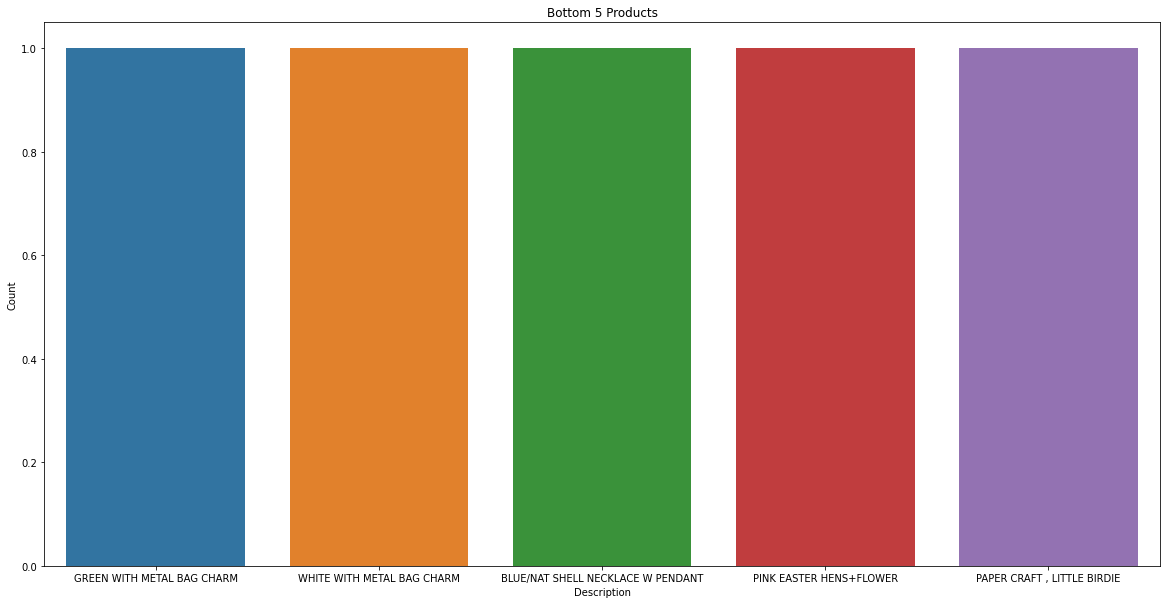

In [42]:
# bottom 5
plt.figure(figsize=(20,10))
plt.title('Bottom 5 Products')
sns.barplot(x='Description',y='Count',data=Description_df[-5:])

In [43]:
# top selling products by quantity
product2=retail_data.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)
product2

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
                                      ...  
PINK POLKADOT KIDS BAG                    1
WHITE ROSEBUD  PEARL EARRINGS             1
HEN HOUSE W CHICK IN NEST                 1
CAPIZ CHANDELIER                          1
EASTER CRAFT IVY WREATH WITH CHICK        1
Name: Quantity, Length: 3877, dtype: int64

In [44]:
# top 5 selling products based on quantity
print('Top 5 selling products based on quantity: ')
print('')
print(product2[:5])

Top 5 selling products based on quantity: 

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
Name: Quantity, dtype: int64


In [45]:
# bottom 5 selling products based on  quantity
print('Bottom 5 selling products based on quantity: ')
print('----------------------------------------------')
print(product2[-5:])

Bottom 5 selling products based on quantity: 
----------------------------------------------
Description
PINK POLKADOT KIDS BAG                1
WHITE ROSEBUD  PEARL EARRINGS         1
HEN HOUSE W CHICK IN NEST             1
CAPIZ CHANDELIER                      1
EASTER CRAFT IVY WREATH WITH CHICK    1
Name: Quantity, dtype: int64


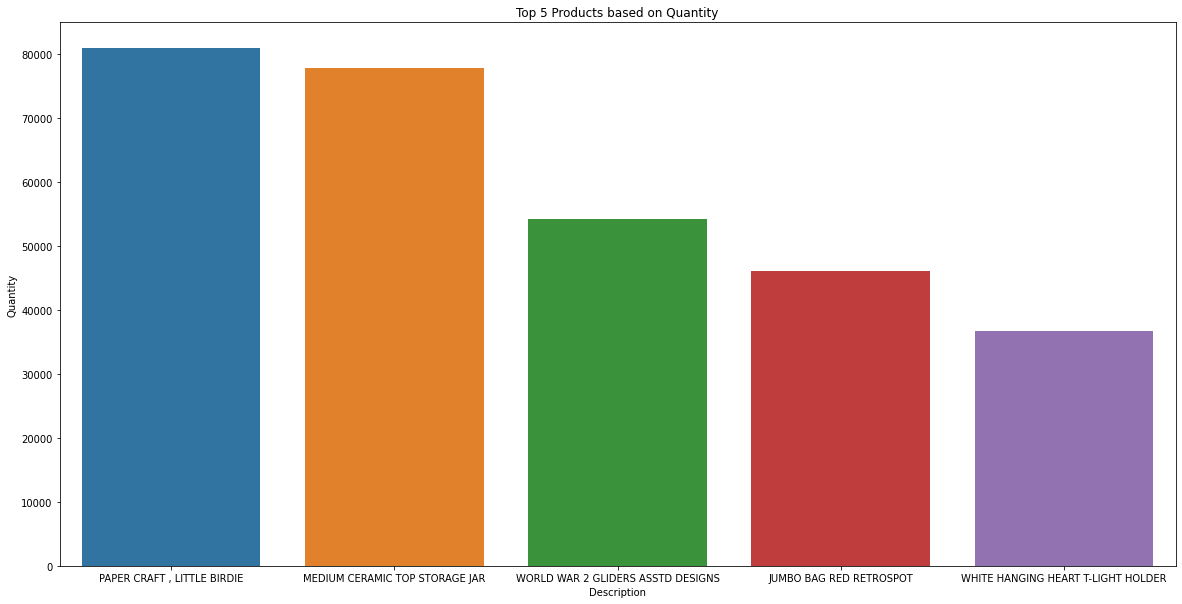

In [80]:
# visualizing
Description_df=retail_data.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
plt.title('Top 5 Products based on Quantity')
sns.barplot(x='Description',y='Quantity',data=Description_df[:5])

In [84]:
# finding max unit price
print('Maximum unit price of a product is ',max(retail_data['UnitPrice']))

Maximum unit price of a product is  8142.75


In [85]:
#The most expensive product
retail_data['Description'][(retail_data['UnitPrice']==max(retail_data['UnitPrice']))]

116879    POSTAGE
Name: Description, dtype: object

In [86]:
# finding min unit price
print('The minimum unit price of a product is = ',min(retail_data['UnitPrice']))

The minimum unit price of a product is =  0.0


In [87]:
# the most cheapest product
retail_data['Description'][(retail_data['UnitPrice']==min(retail_data['UnitPrice']))]

6744             ROUND CAKE TIN VINTAGE GREEN
22096            ADVENT CALENDAR GINGHAM SACK
24893                REGENCY CAKESTAND 3 TIER
28582                 PAPER BUNTING RETROSPOT
28584                  PLASTERS IN TIN SKULLS
33947           ORGANISER WOOD ANTIQUE WHITE 
53001            FAIRY CAKES NOTEBOOK A6 SIZE
84542     CERAMIC BOWL WITH LOVE HEART DESIGN
91635      MINI CAKE STAND  HANGING STRAWBERY
96134             HEART GARLAND RUSTIC PADDED
105823     CHILDS BREAKFAST SET CIRCUS PARADE
127078                          PARTY BUNTING
135490              SET OF 6 SOLDIER SKITTLES
192464             OVAL WALL MIRROR DIAMANTE 
194977               JAM MAKING SET WITH JARS
197495                                 Manual
206671             SET OF 6 NATIVITY MAGNETS 
221550       SET OF 2 CERAMIC PAINTED HEARTS 
221551    SET OF 2 CERAMIC CHRISTMAS REINDEER
221552               36 FOIL STAR CAKE CASES 
221553                     POLKADOT RAIN HAT 
253564             PADS TO MATCH A

# RFM

In [49]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
import datetime
Latest_Date = datetime.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = retail_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','TotalAmount': 'Monetary'}, inplace=True)
rfm_df.reset_index(inplace=True)
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,721,2045.53


In [51]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   object 
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 135.7+ KB


In [52]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,90.512100,2048.215924
std,100.007757,225.515328,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,306.455000
50%,50.000000,41.000000,668.560000
75%,141.500000,98.000000,1660.315000
max,373.000000,7676.000000,280206.020000


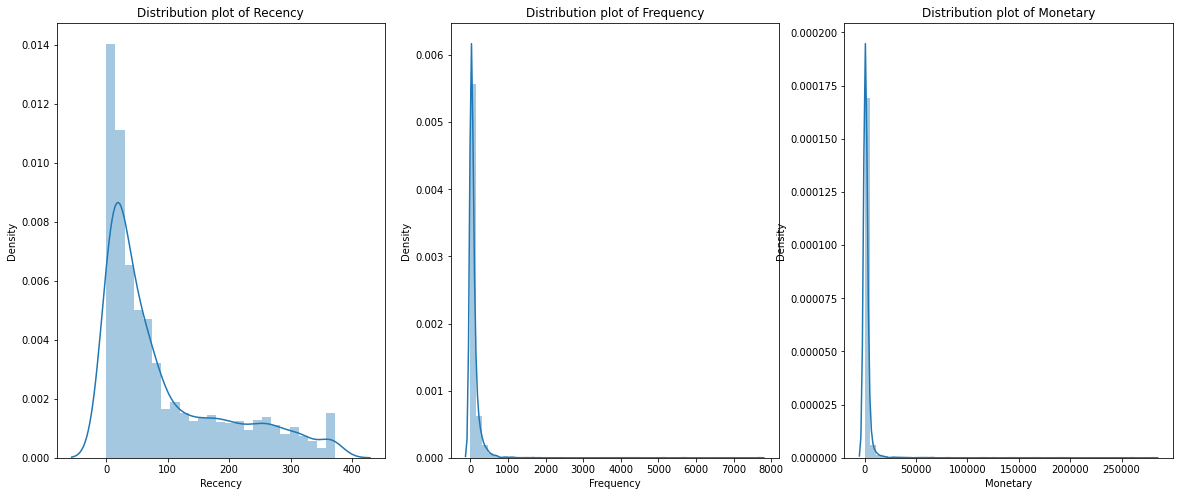

In [53]:
# visualizing using distplot
list2=['Recency','Frequency','Monetary']
plt.figure(figsize=(20,8))
for index,item in enumerate(list2):
  plt.subplot(1,3,index+1)
  sns.distplot(rfm_df[item])
  plt.title(f'Distribution plot of {item}')

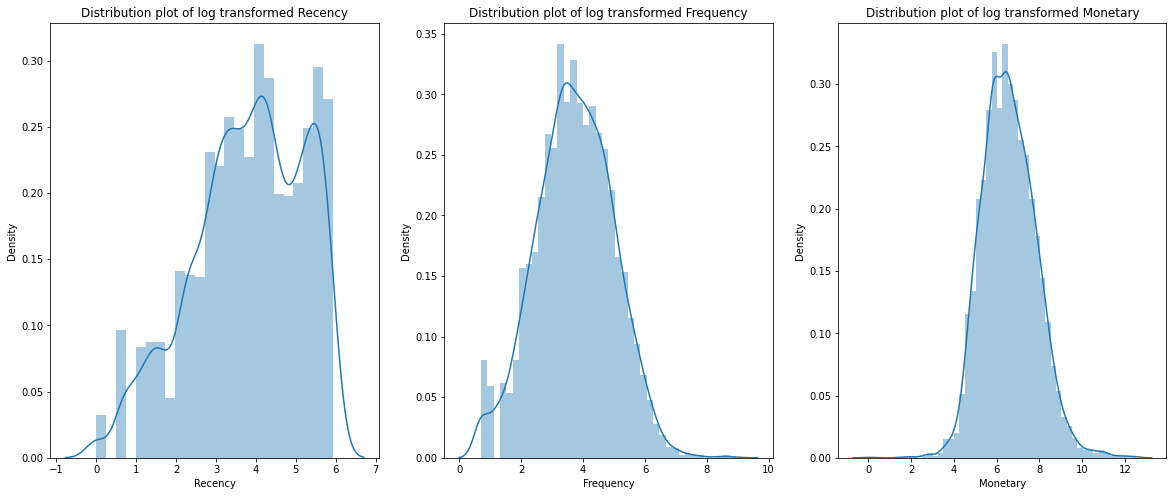

In [54]:
# visualizing using distplot (log transformed)
list2=['Recency','Frequency','Monetary']
plt.figure(figsize=(20,8))
for index,item in enumerate(list2):
  plt.subplot(1,3,index+1)
  sns.distplot(np.log1p(rfm_df[item]))
  plt.title(f'Distribution plot of log transformed {item}')

In [56]:
import math
# creating log transformed columns
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log1p)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log1p)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log1p)

In [57]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,12346.0,325,1,77183.60,5.786897,0.693147,11.253955
1,12347.0,2,182,4310.00,1.098612,5.209486,8.368925
2,12348.0,75,31,1797.24,4.330733,3.465736,7.494564
3,12349.0,18,73,1757.55,2.944439,4.304065,7.472245
4,12350.0,310,17,334.40,5.739793,2.890372,5.815324


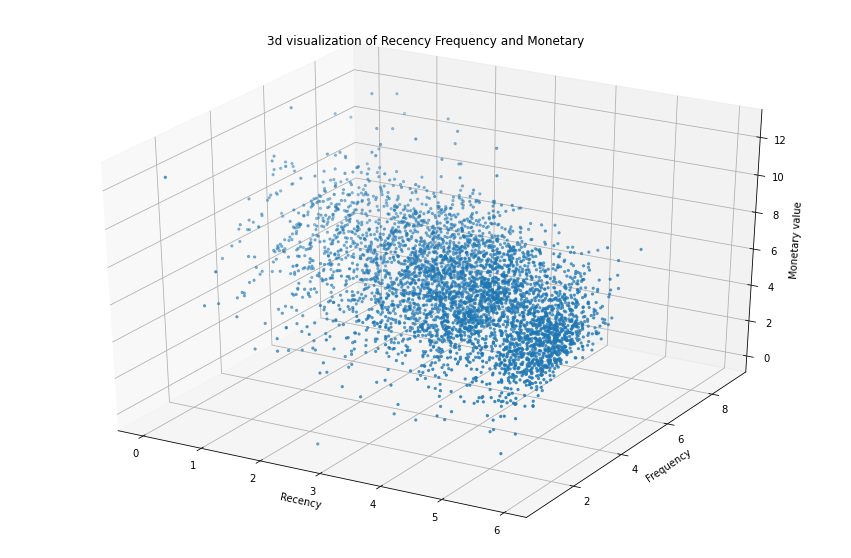

In [58]:
# 3d visualization of rfm
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_title('3d visualization of Recency Frequency and Monetary')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [71]:
# standardizing
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.39978126453159446
For n_clusters = 3 The average silhouette_score is : 0.3052642467241447
For n_clusters = 4 The average silhouette_score is : 0.30695484821693797
For n_clusters = 5 The average silhouette_score is : 0.2759681336694226
For n_clusters = 6 The average silhouette_score is : 0.27366586194892706
For n_clusters = 7 The average silhouette_score is : 0.2629877848850681
For n_clusters = 8 The average silhouette_score is : 0.25861793954272266
For n_clusters = 9 The average silhouette_score is : 0.25823273819630765
For n_clusters = 10 The average silhouette_score is : 0.25751358771536564
For n_clusters = 11 The average silhouette_score is : 0.26473262510731294
For n_clusters = 12 The average silhouette_score is : 0.265299537683749
For n_clusters = 13 The average silhouette_score is : 0.25476767846649323
For n_clusters = 14 The average silhouette_score is : 0.24916790074250786
For n_clusters = 15 The average silhouette_score is

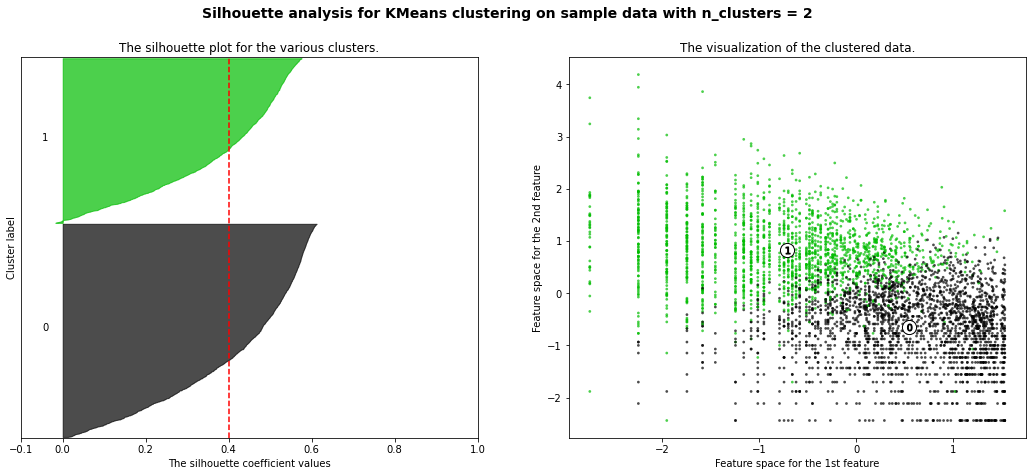

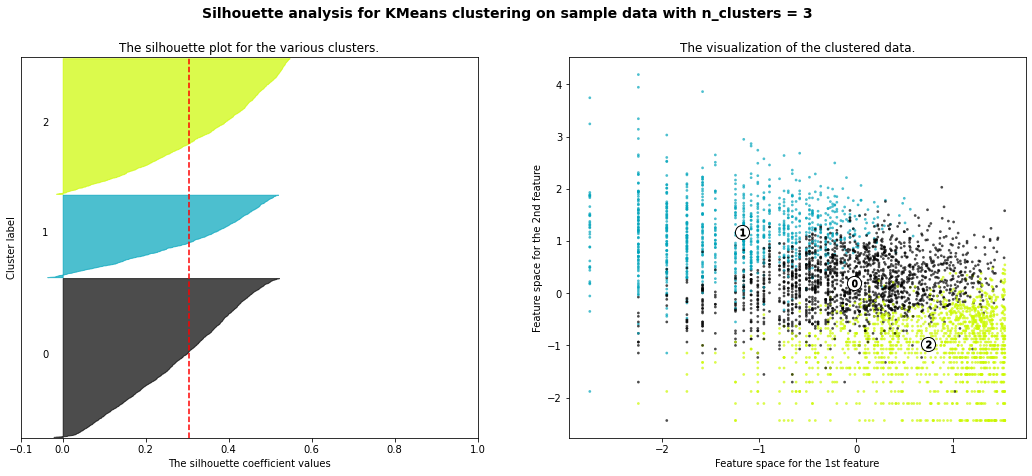

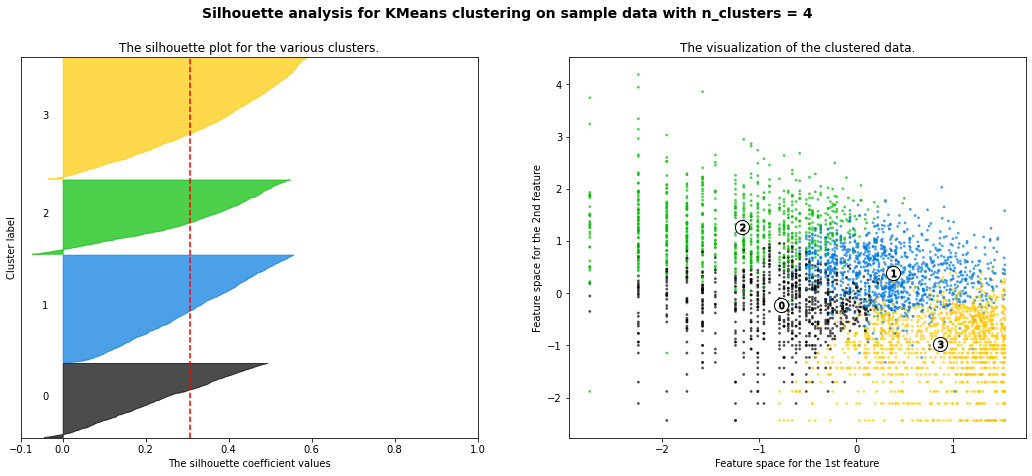

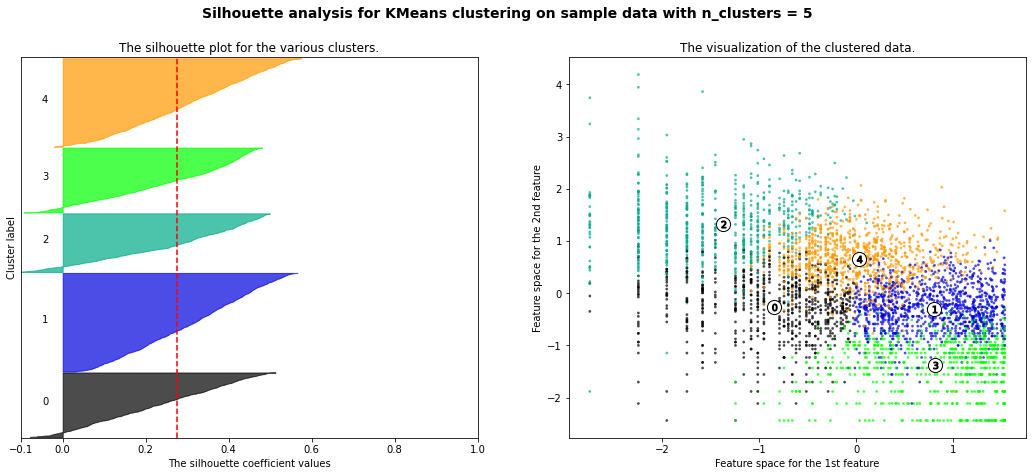

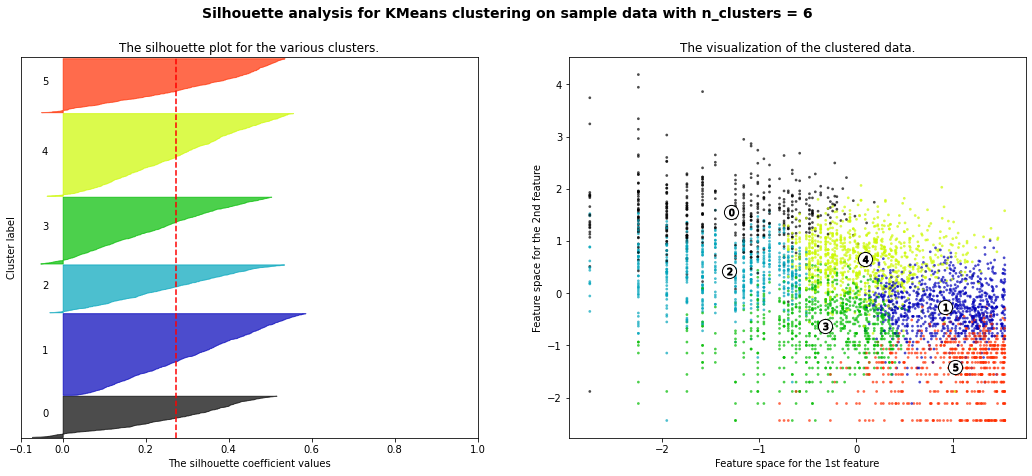

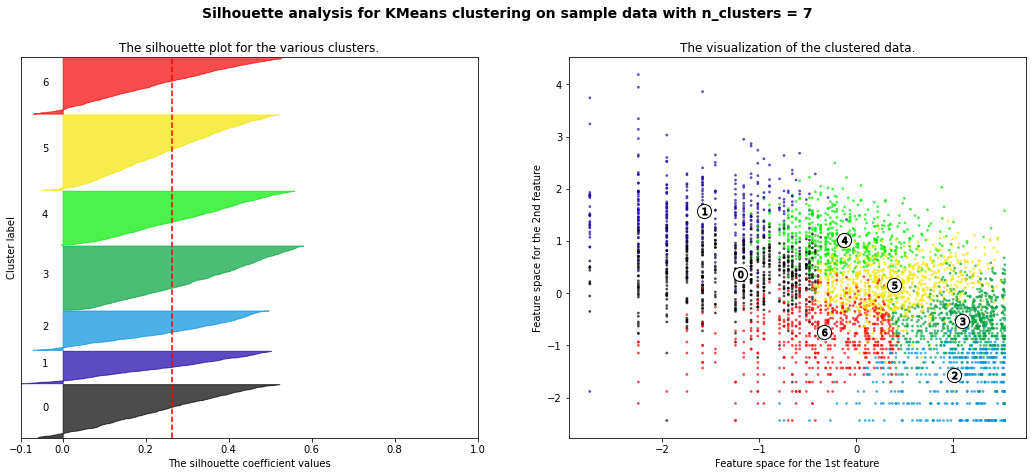

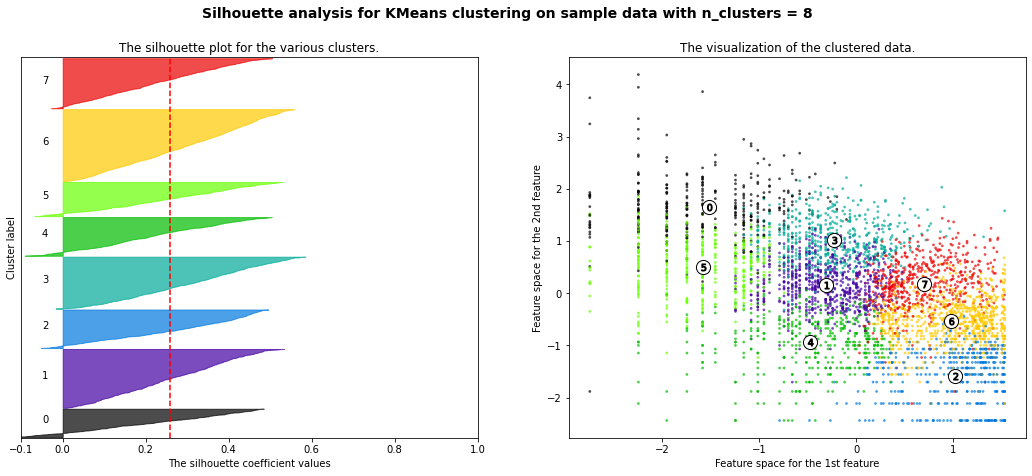

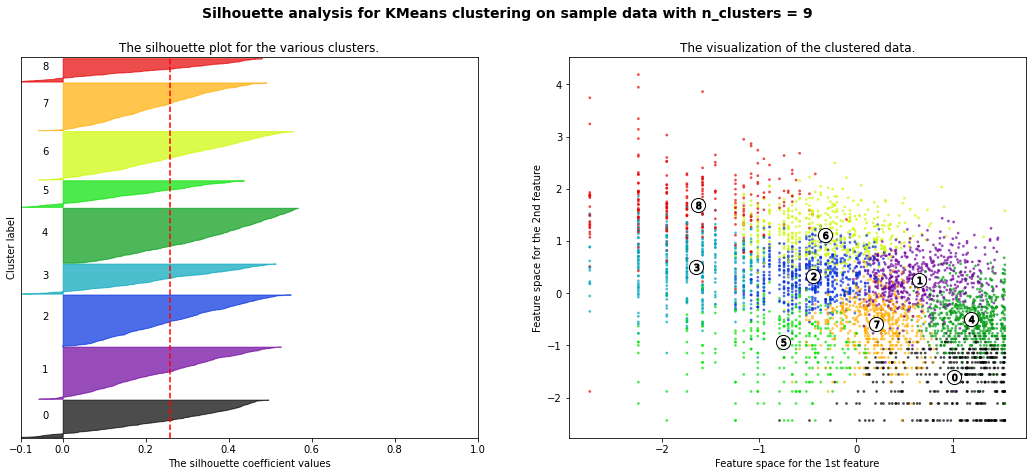

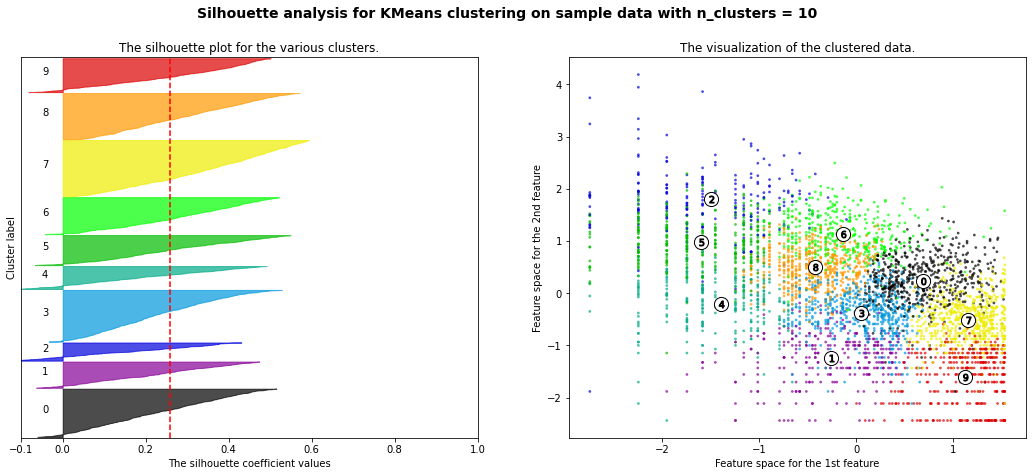

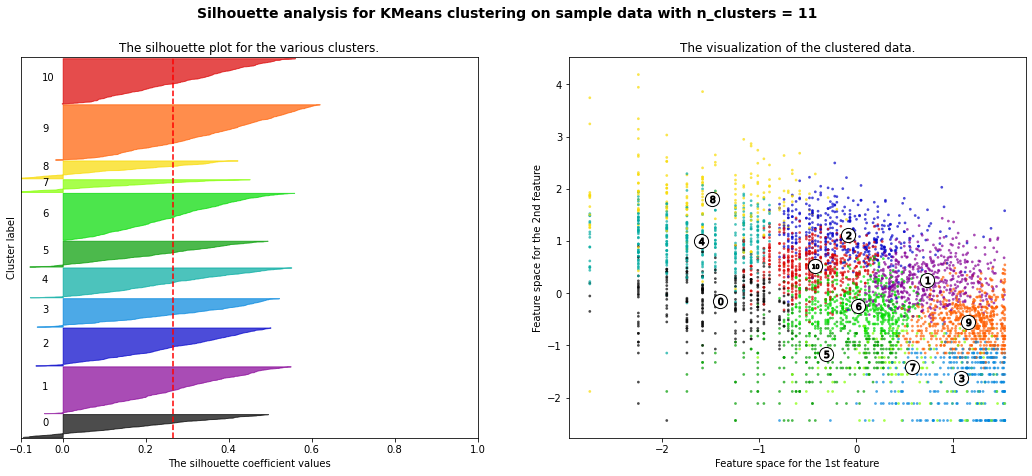

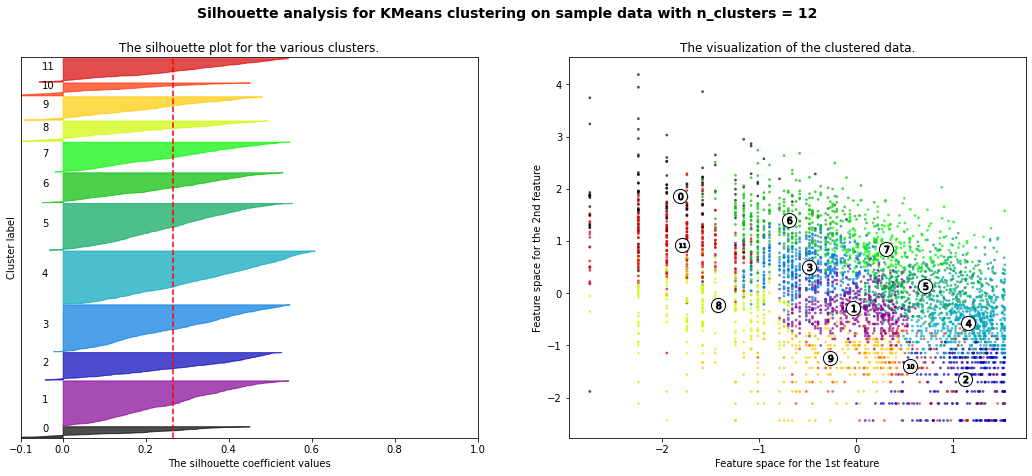

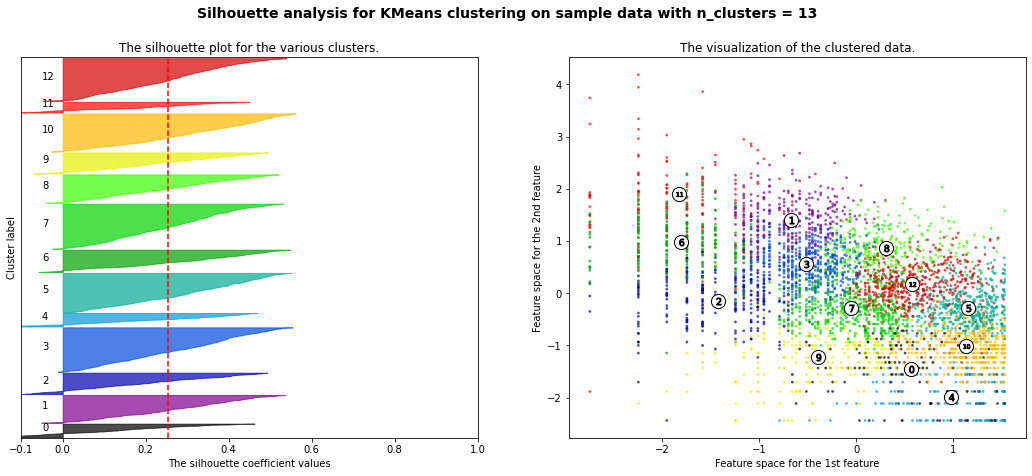

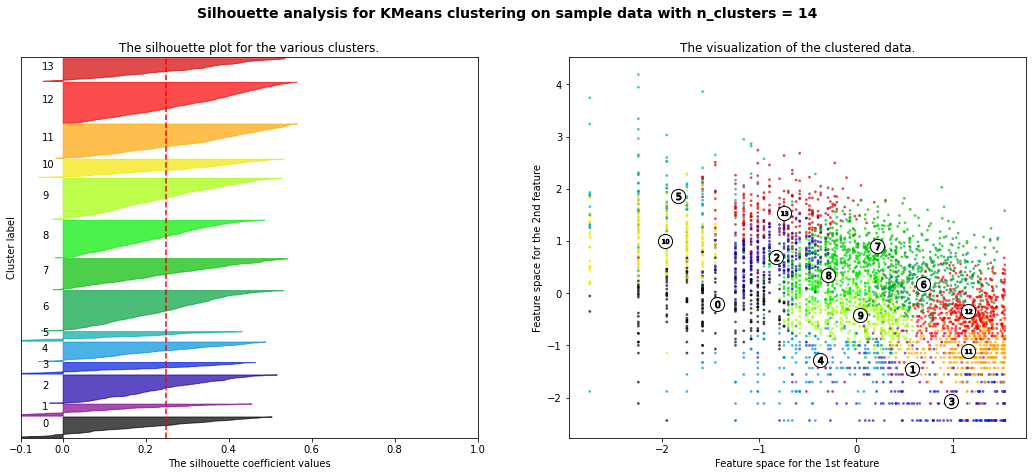

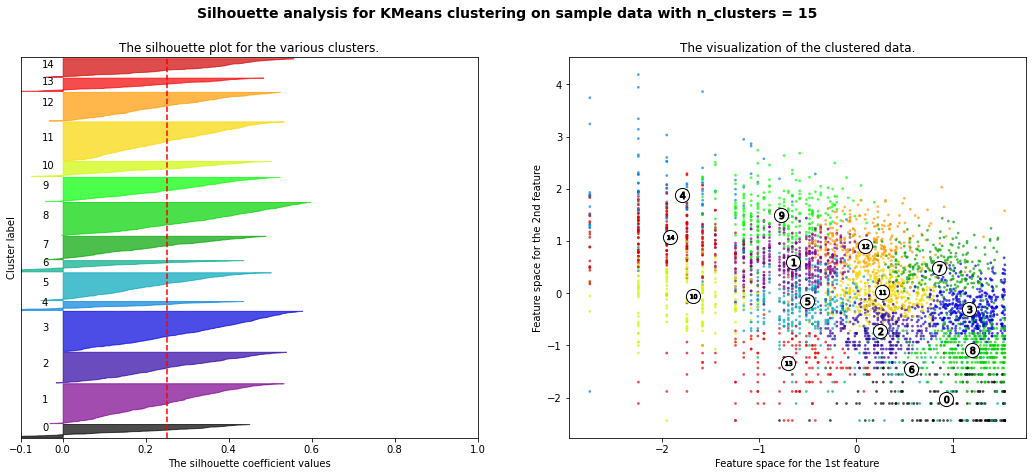

In [76]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()